In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
leads=pd.read_csv("D:\\Innomick\\lead scoring\\Leads.csv")
leads.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape


(9240, 37)

In [4]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x:str(x.unique()),axis=0), "NaN":round(data.isnull().sum(),1),"NaN%":round(100*(data.isnull().sum()/len(data.index)), 2)})
inspect_data(leads)

,Data Type,No of Levels,Levels,NaN,NaN%
Prospect ID,object,9240,['7927b2df-8bba-4d29-b9a2-b6e0beafe620'\n '2a2...,0,0.00
Lead Number,int64,9240,[660737 660728 660727 ... 579545 579538 579533],0,0.00
Lead Origin,object,5,['API' 'Landing Page Submission' 'Lead Add For...,0,0.00
Lead Source,object,21,['Olark Chat' 'Organic Search' 'Direct Traffic...,36,0.39
Do Not Email,object,2,['No' 'Yes'],0,0.00
Do Not Call,object,2,['No' 'Yes'],0,0.00
Converted,int64,2,[0 1],0,0.00
TotalVisits,float64,41,[0.0 5.0 2.0 1.0 4.0 8.0 11.0 6.0 3.0 7.0 13.0...,137,1.48
Total Time Spent on Website,int64,1731,[0 674 1532 ... 603 483 927],0,0.00
Page Views Per Visit,float64,114,[0.0 2.5 2.0 1.0 4.0 8.0 2.67 11.0 5.0 6.0 3.0...,137,1.48


In [5]:
## removing the attributes which are not important to the data
leads = leads.drop(['Prospect ID','Lead Number'],axis=1)

In [6]:
cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 30):
        leads.drop(i, 1, inplace = True)

In [7]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
inspect_data(leads)

,Data Type,No of Levels,Levels,NaN,NaN%
Lead Origin,object,5,['API' 'Landing Page Submission' 'Lead Add For...,0,0.00
Lead Source,object,21,['Olark Chat' 'Organic Search' 'Direct Traffic...,36,0.39
Do Not Email,object,2,['No' 'Yes'],0,0.00
Do Not Call,object,2,['No' 'Yes'],0,0.00
Converted,int64,2,[0 1],0,0.00
TotalVisits,float64,41,[0.0 5.0 2.0 1.0 4.0 8.0 11.0 6.0 3.0 7.0 13.0...,137,1.48
Total Time Spent on Website,int64,1731,[0 674 1532 ... 603 483 927],0,0.00
Page Views Per Visit,float64,114,[0.0 2.5 2.0 1.0 4.0 8.0 2.67 11.0 5.0 6.0 3.0...,137,1.48
Last Activity,object,17,['Page Visited on Website' 'Email Opened' 'Unr...,103,1.11
Country,object,38,[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United ...,2461,26.63


In [9]:
## removing the attributes which are having only 1 level i.e constant
leads = leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [10]:
leads.shape

(9240, 24)

In [11]:

leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
China                      2
Uganda                     2
Italy                      2
Asia/Pacific Region        2
Ghana                      2
Philippines                2
Bangladesh                 2
Belgium                    2
Netherlands                2
Russia                     1
Liberia                    1
Denmark                    1
Malaysia                   1
Indonesia                  1
Sri Lanka                  1
Vietnam       

In [12]:
leads['Country'] = leads['Country'].replace(np.nan,'India')
leads['Country'] = leads['Country'].replace('unknown','India')

In [13]:
leads['Country'].value_counts()

India                   8958
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Kuwait                     4
Sweden                     3
China                      2
Italy                      2
Uganda                     2
Asia/Pacific Region        2
Ghana                      2
Philippines                2
Bangladesh                 2
Belgium                    2
Netherlands                2
Russia                     1
Liberia                    1
Denmark                    1
Malaysia                   1
Indonesia                  1
Sri Lanka                  1
Vietnam                    1
Kenya         

In [14]:
leads = leads.drop(['Country'],axis=1)

In [15]:
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

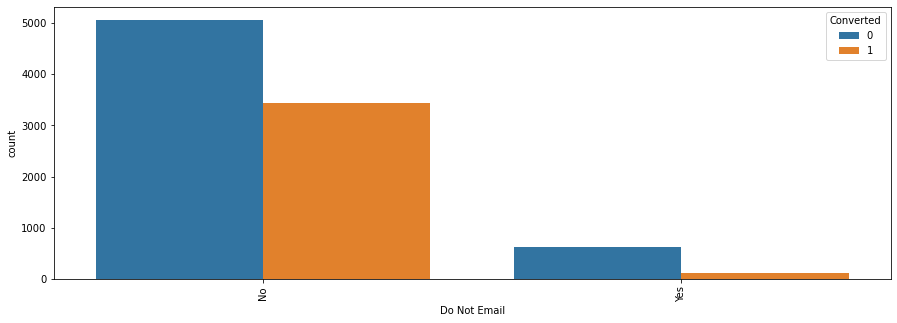

In [16]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [17]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [18]:
leads= leads.drop(['Do Not Call'],axis=1)

In [19]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [20]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Email Unchecked')

In [21]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Email Unchecked                  103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [22]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','Business Administration','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management Services')

In [24]:
leads['Specialization'].value_counts(dropna=False)

Management Services                  4656
Select                               1942
NaN                                  1438
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')


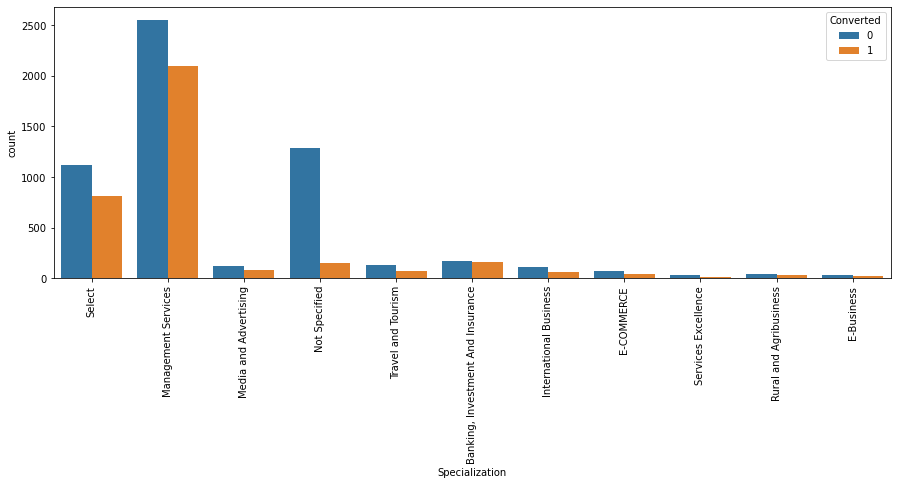

In [26]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Specialization'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [27]:
leads['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [28]:
leads['How did you hear about X Education']= leads['How did you hear about X Education'].replace(np.nan, 'Other')

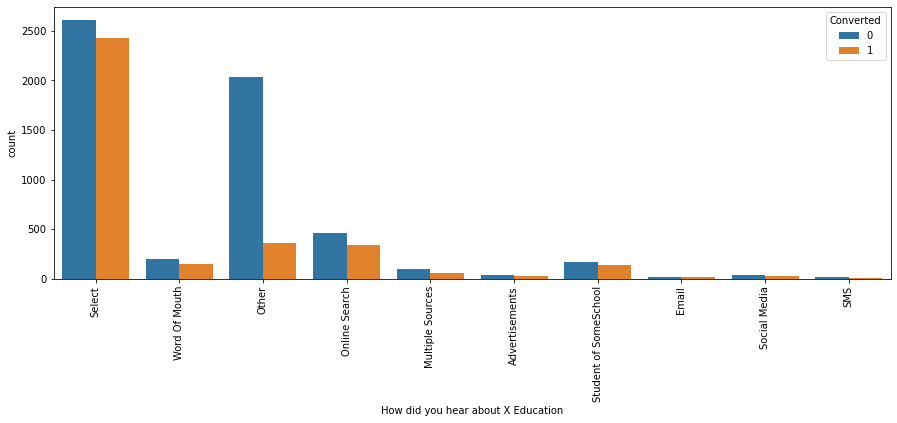

In [29]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['How did you hear about X Education'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [30]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
leads['What is your current occupation']= leads['What is your current occupation'].replace(np.nan, 'Unemployed')

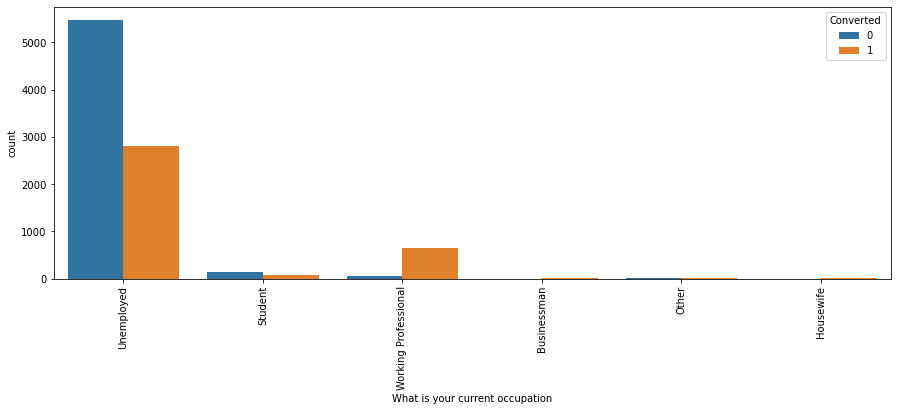

In [32]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
leads= leads.drop(['What matters most to you in choosing a course'],axis=1)

In [35]:
leads['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

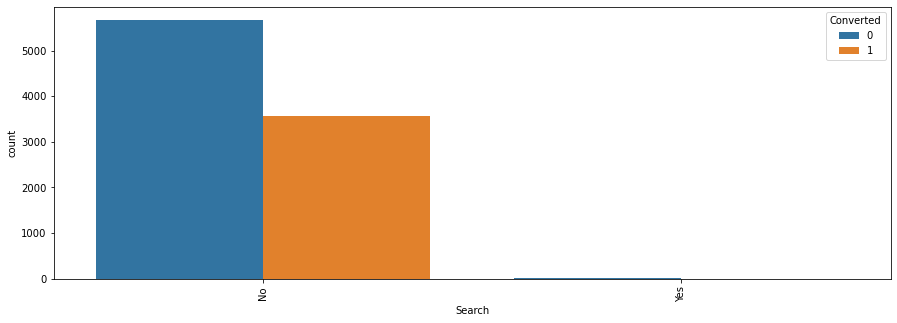

In [36]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Search'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
leads= leads.drop(['Search'],axis=1)

In [38]:
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [39]:
leads= leads.drop(['Newspaper Article'],axis=1)

In [40]:
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [41]:
leads= leads.drop(['X Education Forums'],axis=1)

In [42]:
leads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [43]:
leads= leads.drop(['Newspaper'],axis=1)

In [44]:
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [45]:
leads= leads.drop(['Digital Advertisement'],axis=1)

In [46]:
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [47]:
leads= leads.drop(['Through Recommendations'],axis=1)

In [48]:
leads['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [49]:
leads['Lead Profile']= leads['Lead Profile'].replace(np.nan, 'Other Leads')

In [50]:
leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [51]:
leads['City']= leads['City'].replace(np.nan, 'Other Cities')

In [52]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [53]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [54]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
youtubechannel          1
testone                 1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [55]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Social Media')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

In [56]:
inspect_data(leads)

,Data Type,No of Levels,Levels,NaN,NaN%
Lead Origin,object,5,['API' 'Landing Page Submission' 'Lead Add For...,0,0.00
Lead Source,object,19,['Olark Chat' 'Organic Search' 'Direct Traffic...,0,0.00
Do Not Email,object,2,['No' 'Yes'],0,0.00
Converted,int64,2,[0 1],0,0.00
TotalVisits,float64,41,[0.0 5.0 2.0 1.0 4.0 8.0 11.0 6.0 3.0 7.0 13.0...,137,1.48
Total Time Spent on Website,int64,1731,[0 674 1532 ... 603 483 927],0,0.00
Page Views Per Visit,float64,114,[0.0 2.5 2.0 1.0 4.0 8.0 2.67 11.0 5.0 6.0 3.0...,137,1.48
Last Activity,object,18,['Page Visited on Website' 'Email Opened' 'Unr...,0,0.00
Specialization,object,11,['Select' 'Management Services' 'Media and Adv...,0,0.00
How did you hear about X Education,object,10,['Select' 'Word Of Mouth' 'Other' 'Online Sear...,0,0.00


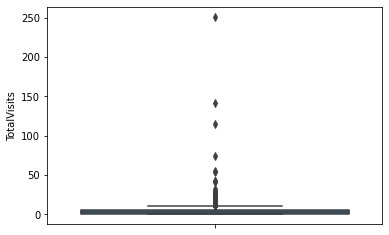

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [58]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

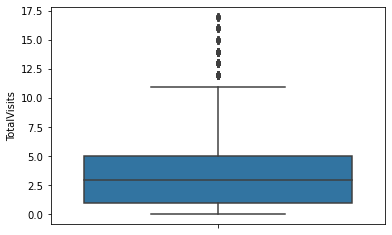

In [59]:
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [60]:
leads.shape

(9020, 15)

In [61]:
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

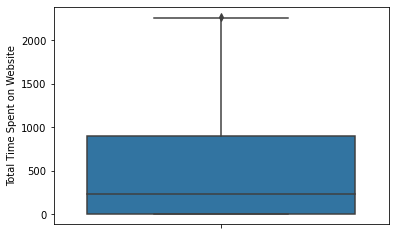

In [62]:
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

In [63]:
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8929.000000
mean        2.303194
std         1.993860
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

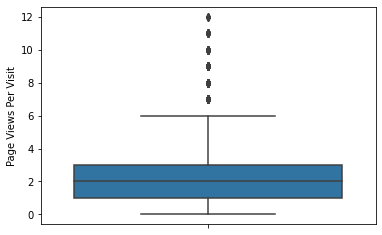

In [64]:
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [65]:
leads.shape

(8881, 15)

In [66]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [67]:
num_cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

cat_cols= leads.columns.difference(num_cols)
cat_cols

Index(['A free copy of Mastering The Interview', 'City', 'Converted',
       'Do Not Email', 'How did you hear about X Education', 'Last Activity',
       'Last Notable Activity', 'Lead Origin', 'Lead Profile', 'Lead Source',
       'Specialization', 'What is your current occupation'],
      dtype='object')

In [68]:
leads[cat_cols] = leads[cat_cols].apply(lambda x: x.astype('category'))
leads[num_cols] = leads[num_cols].apply(lambda x: x.astype('float'))
leads.dtypes

Lead Origin                               category
Lead Source                               category
Do Not Email                              category
Converted                                 category
TotalVisits                                float64
Total Time Spent on Website                float64
Page Views Per Visit                       float64
Last Activity                             category
Specialization                            category
How did you hear about X Education        category
What is your current occupation           category
Lead Profile                              category
City                                      category
A free copy of Mastering The Interview    category
Last Notable Activity                     category
dtype: object

In [69]:
num_data = leads.loc[:,num_cols]
cat_data = leads.loc[:,cat_cols]

In [70]:
cat_data = pd.get_dummies(cat_data,columns=['A free copy of Mastering The Interview', 'City',
       'Do Not Email', 'How did you hear about X Education', 'Last Activity',
       'Last Notable Activity', 'Lead Origin', 'Lead Profile', 'Lead Source',
       'Specialization', 'What is your current occupation'],drop_first=True)

In [71]:
leads = pd.concat([num_data,cat_data],axis=1)

In [72]:
leads.dtypes

TotalVisits                                              float64
Total Time Spent on Website                              float64
Page Views Per Visit                                     float64
Converted                                               category
A free copy of Mastering The Interview_Yes                 uint8
                                                          ...   
What is your current occupation_Housewife                  uint8
What is your current occupation_Other                      uint8
What is your current occupation_Student                    uint8
What is your current occupation_Unemployed                 uint8
What is your current occupation_Working Professional       uint8
Length: 93, dtype: object

In [73]:
x = leads.drop("Converted",axis=1)
y = leads["Converted"]

In [74]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3,random_state=1)

In [75]:
print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)


(6216, 92)
(2665, 92)
(6216,)
(2665,)


In [76]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 9239
Data columns (total 92 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   TotalVisits                                               8881 non-null   float64
 1   Total Time Spent on Website                               8881 non-null   float64
 2   Page Views Per Visit                                      8881 non-null   float64
 3   A free copy of Mastering The Interview_Yes                8881 non-null   uint8  
 4   City_Other Cities                                         8881 non-null   uint8  
 5   City_Other Cities of Maharashtra                          8881 non-null   uint8  
 6   City_Other Metro Cities                                   8881 non-null   uint8  
 7   City_Select                                               8881 non-null   uint8  
 8   City_Thane & Outsk

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=x_train.select_dtypes(include=['float64']).columns

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,...,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
690,-0.377623,2.074796,-0.130484,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1215,-1.127801,-0.867926,-1.145716,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5238,0.372555,-0.161303,0.884748,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
135,0.747643,1.144933,1.392364,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4425,-1.127801,-0.867926,-1.145716,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [78]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred_train_dec = logreg.predict(x_train)
y_pred_valid_dec = logreg.predict(x_validation)

In [81]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_pred_train_dec})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,0,0,690
1,0,0,1215
2,0,0,5238
3,1,1,135
4,0,1,4425
5,0,0,6266
6,0,0,8319
7,1,1,851
8,1,0,8805
9,0,0,6275


In [82]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_prob )
print(confusion)

[[3463  393]
 [ 617 1743]]


In [83]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))


0.8375160875160875


In [84]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
decision = DecisionTreeClassifier(max_depth=8,class_weight='balanced',random_state=1,min_samples_split=5,splitter='random')
decision.fit(x_train, y_train)
y_pred_valid2 = decision.predict(x_validation)
y_pred_train2= decision.predict(x_train)

In [102]:
y_train_pred_final = pd.DataFrame({'Converted2':y_train.values, 'Converted_prob2':y_pred_train2})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted2,Converted_prob2,Prospect ID
0,0,0,690
1,0,0,1215
2,0,0,5238
3,1,1,135
4,0,1,4425
5,0,0,6266
6,0,0,8319
7,1,1,851
8,1,1,8805
9,0,0,6275


In [103]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted2, y_train_pred_final.Converted_prob2 )
print(confusion)

[[3255  601]
 [ 363 1997]]


In [104]:
print(metrics.accuracy_score(y_train_pred_final.Converted2, y_train_pred_final.Converted_prob2))


0.8449163449163449
